## SALES PREDICTION : DATA SCIENCE PROJECT - 5
In the given project, make use of predictive modelling techniques like linear regression, decision tree regressor, k-nearest neighbours; and subsequently determine accuracies of each technique in predicting value of target variable.

In [1]:
# Importing packages/libraries

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data Extraction and Exploration

In [2]:
d=pd.read_csv("Advertising.csv")

In [3]:
rc=d.shape
print("Number of rows :",rc[0]," and number of columms :",rc[1])

Number of rows : 200  and number of columms : 5


In [4]:
col=d.columns
print("The dataset contains the following columns : \n")
for i in col:
    print(i)

The dataset contains the following columns : 

Unnamed: 0
TV
Radio
Newspaper
Sales


In [5]:
#We drop the first column as its simply index  numbers and don't really add into our model
d=d.drop(d.columns[0],axis=1)

In [6]:
d.shape

(200, 4)

In [7]:
# New set of columns 
col=d.columns
print("The dataset contains the following columns : \n")
for i in col:
    print(i)

The dataset contains the following columns : 

TV
Radio
Newspaper
Sales


In [8]:
d.head()    #First 5 rows

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
d.tail()    #Last 5 rows

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [10]:
d.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

'Sales' is our target variable.

In [11]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Univariate Analysis

In [12]:
d.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


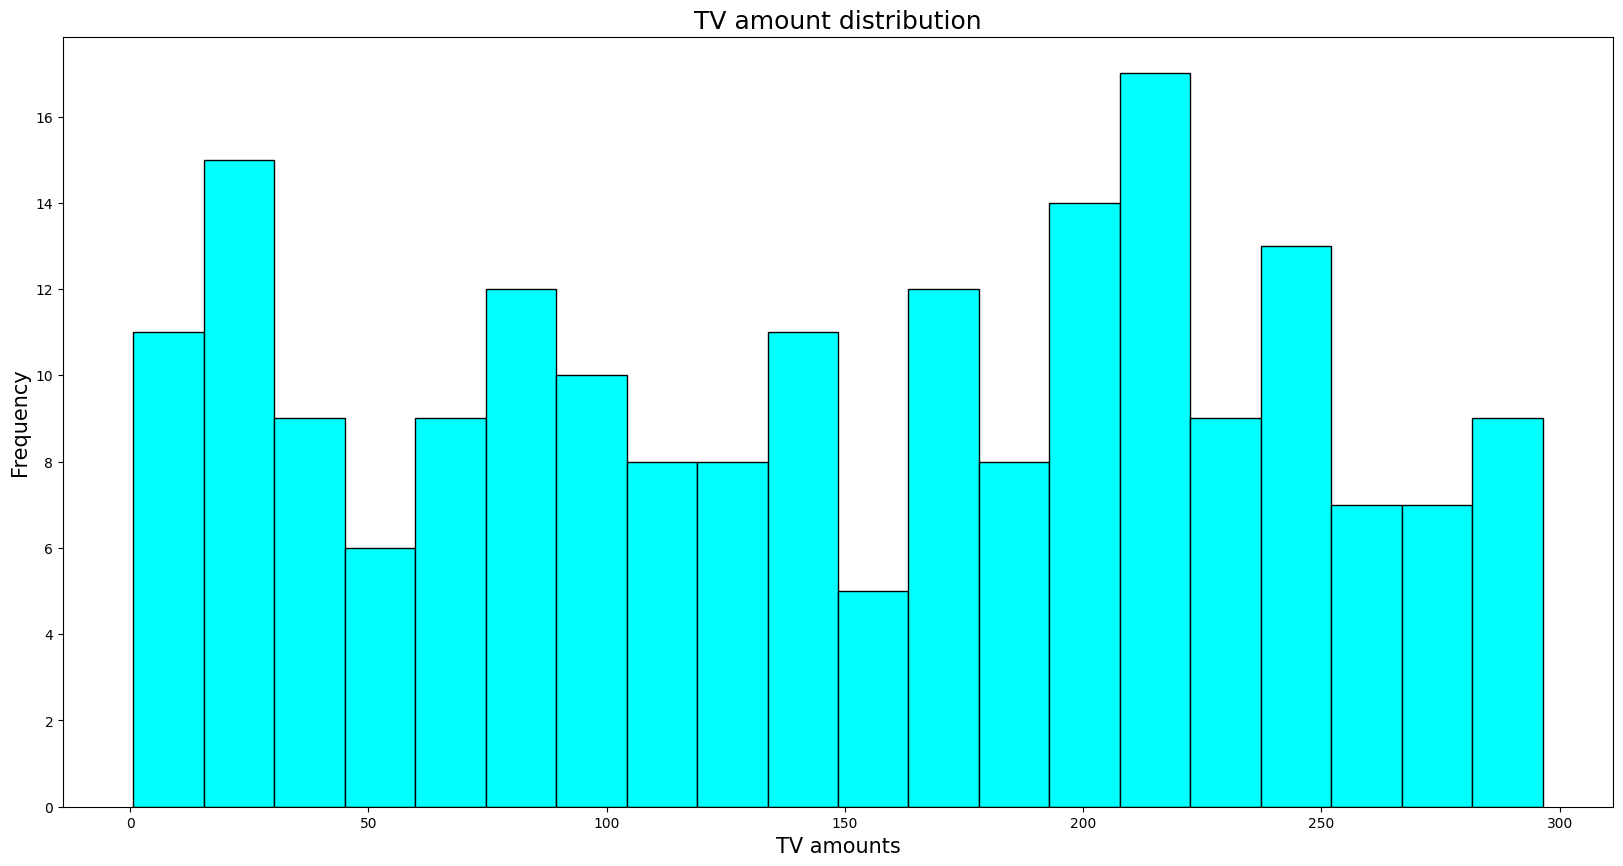

In [13]:
plt.figure(figsize=(20,10))
plt.hist(d['TV'], bins=20, edgecolor="black", facecolor="cyan")
plt.title("TV amount distribution", fontsize=18)
plt.xlabel("TV amounts", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

We infer that for a large number of time the amount paid for TV advertisements is around 200-250 units.

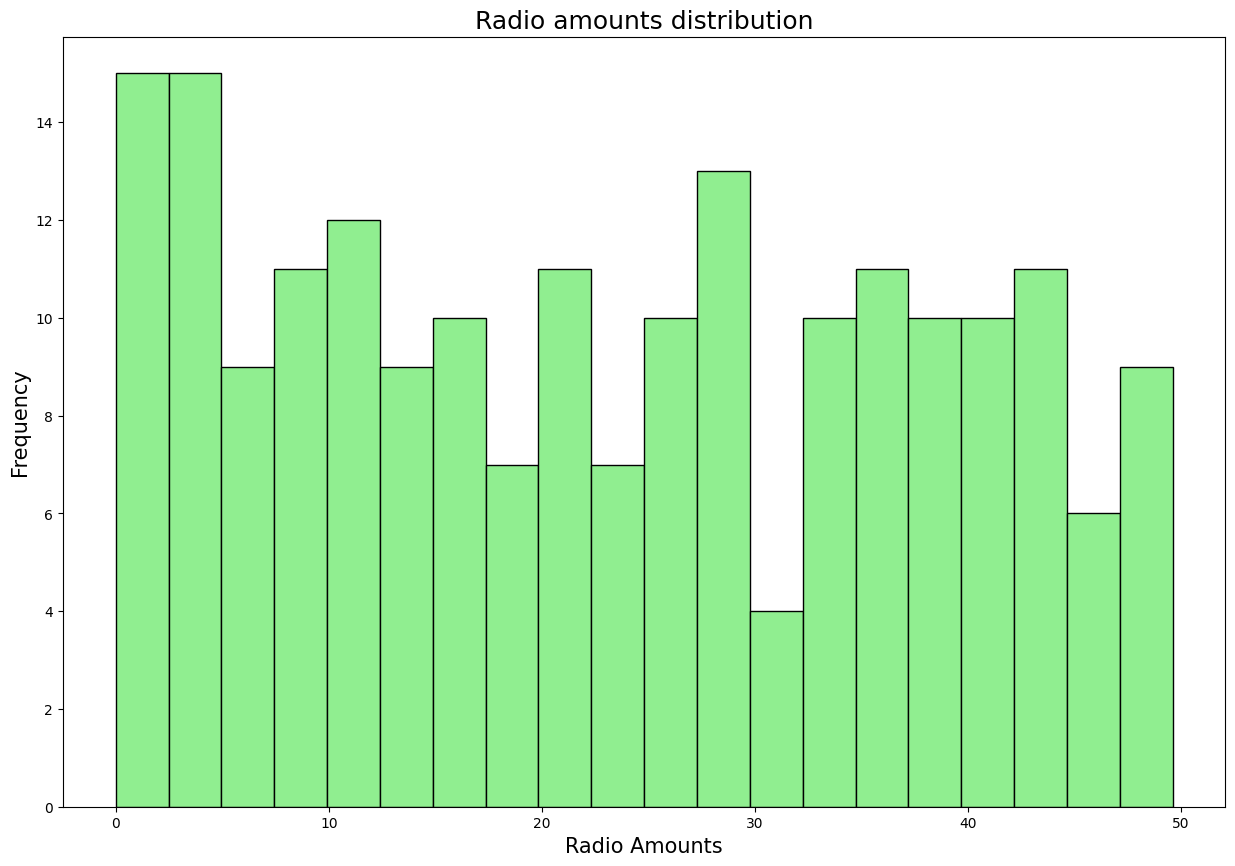

In [14]:
plt.figure(figsize=(15,10))
plt.hist(d['Radio'], bins=20, edgecolor="black", facecolor="lightgreen")
plt.title("Radio amounts distribution", fontsize=18)
plt.xlabel("Radio Amounts", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

We infer that most frequently paid amoubnt for radio advertising is around 0-10 units.

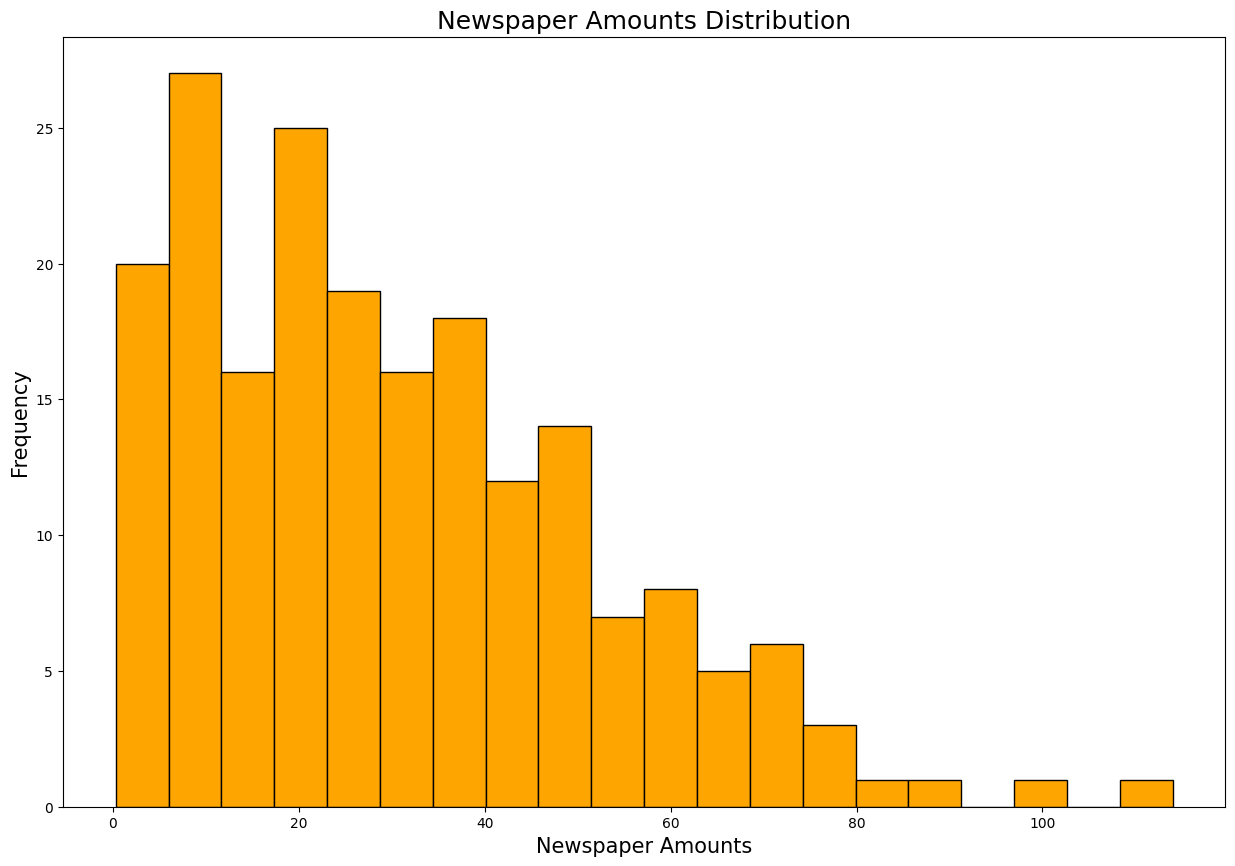

In [15]:
plt.figure(figsize=(15,10))
plt.hist(d['Newspaper'], bins=20, edgecolor="black", facecolor="orange")
plt.title("Newspaper Amounts Distribution", fontsize=18)
plt.xlabel("Newspaper Amounts", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

We infer that the most frequently the amount paid for newspaper advertising is around 0-20 units.

## Bivariate Analysis

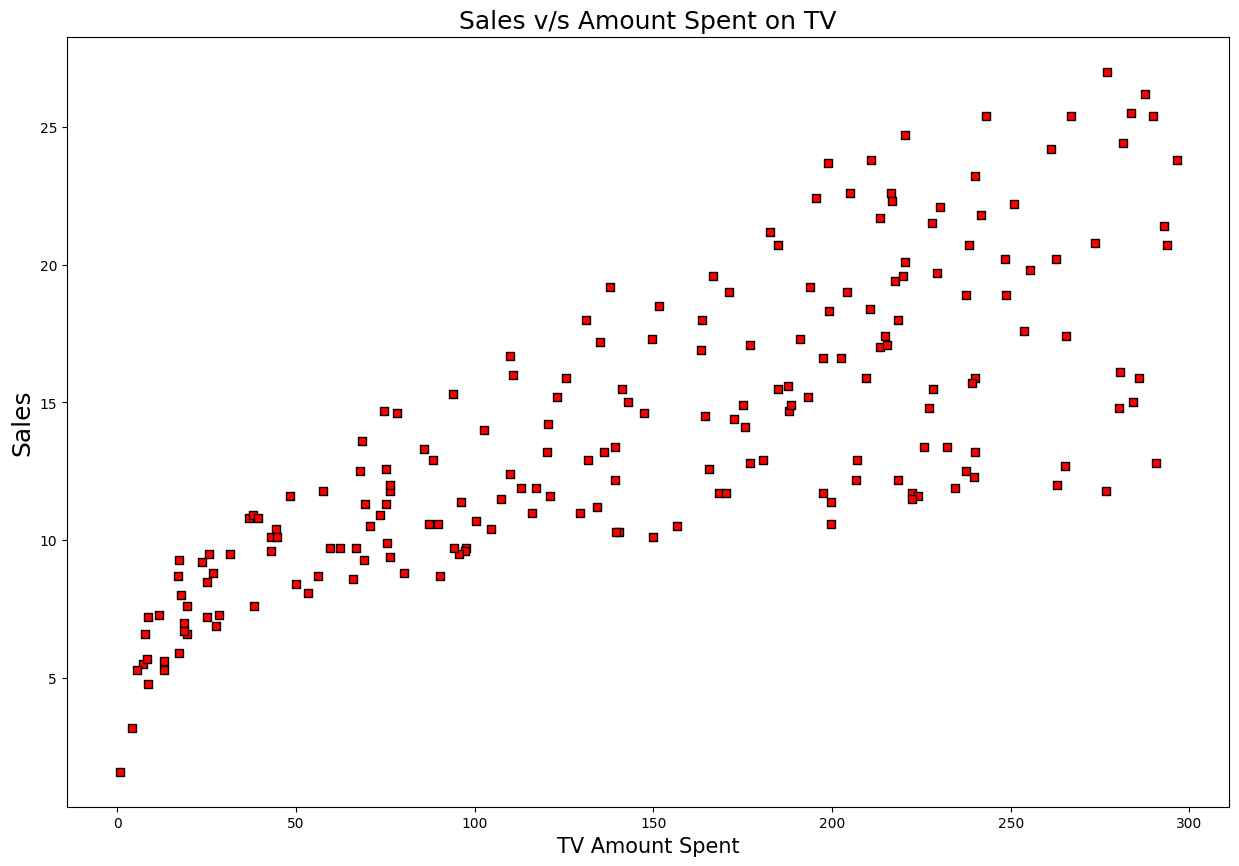

In [16]:
plt.figure(figsize=(15,10))
plt.scatter(d['TV'],d['Sales'],alpha=1,marker='s',edgecolors="black",facecolor='red')
plt.title("Sales v/s Amount Spent on TV",fontsize=18)
plt.xlabel("TV Amount Spent",fontsize=15)
plt.ylabel("Sales",fontsize=18)
plt.show()

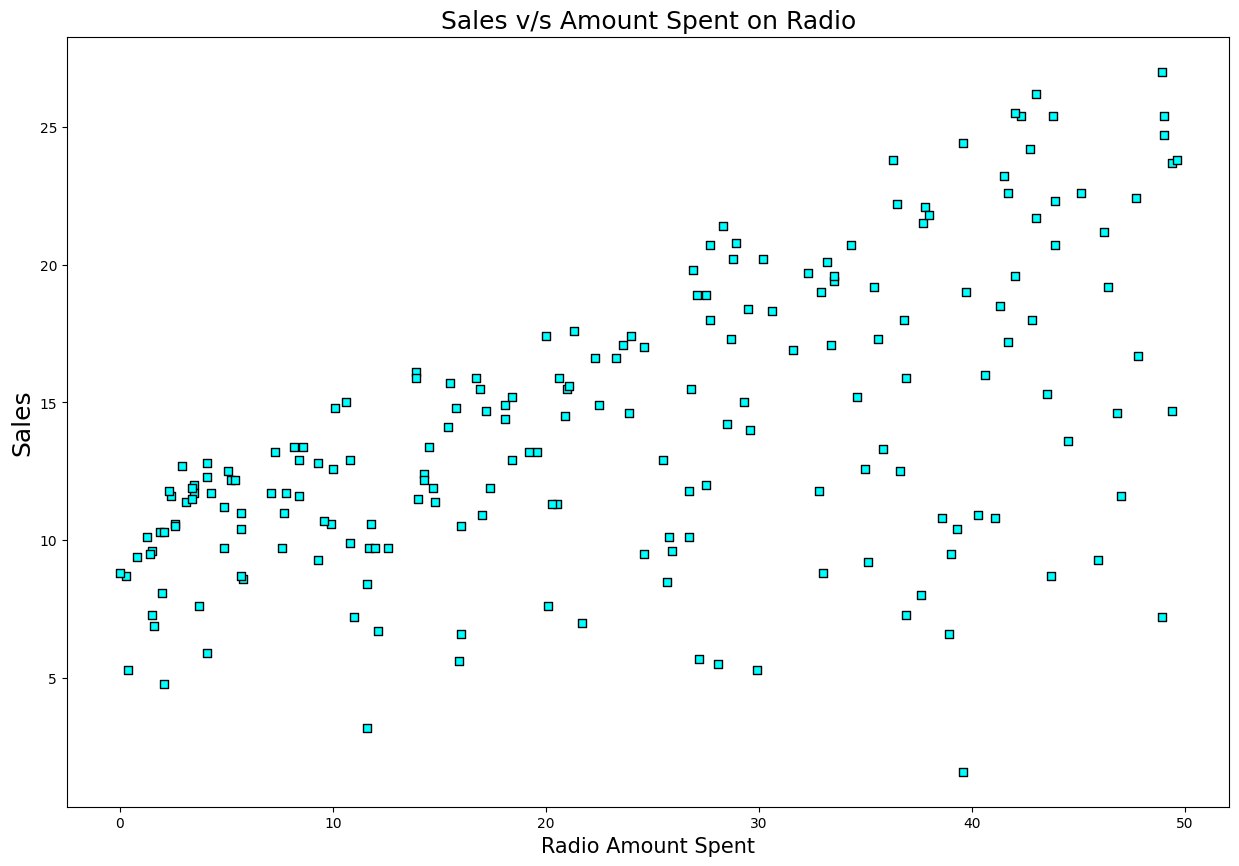

In [17]:
plt.figure(figsize=(15,10))
plt.scatter(d['Radio'],d['Sales'],alpha=1,marker='s',edgecolors="black",facecolor='cyan')
plt.title("Sales v/s Amount Spent on Radio",fontsize=18)
plt.xlabel("Radio Amount Spent",fontsize=15)
plt.ylabel("Sales",fontsize=18)
plt.show()

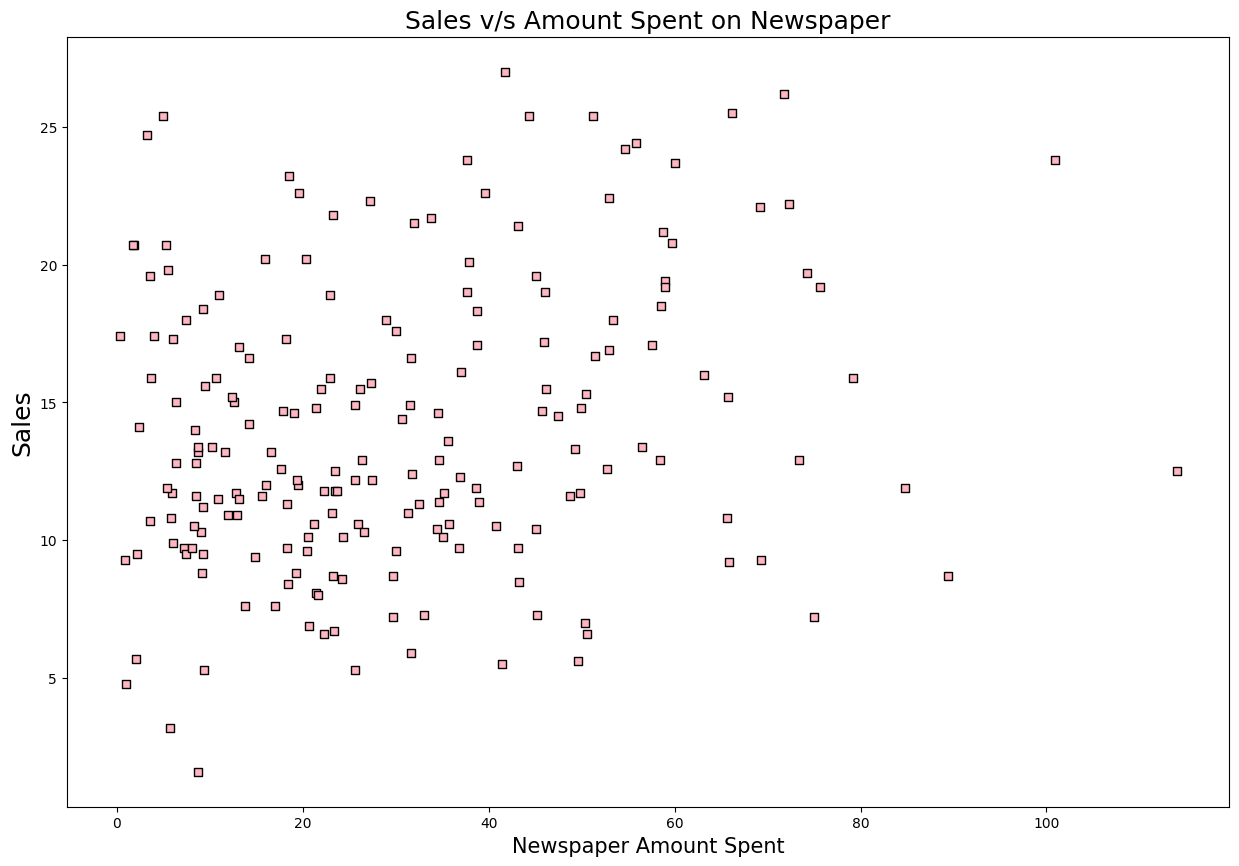

In [18]:
plt.figure(figsize=(15,10))
plt.scatter(d['Newspaper'],d['Sales'],alpha=1,marker='s',edgecolors="black",facecolor='lightpink')
plt.title("Sales v/s Amount Spent on Newspaper",fontsize=18)
plt.xlabel("Newspaper Amount Spent",fontsize=15)
plt.ylabel("Sales",fontsize=18)
plt.show()

Correlation matrix : 

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


<Axes: >

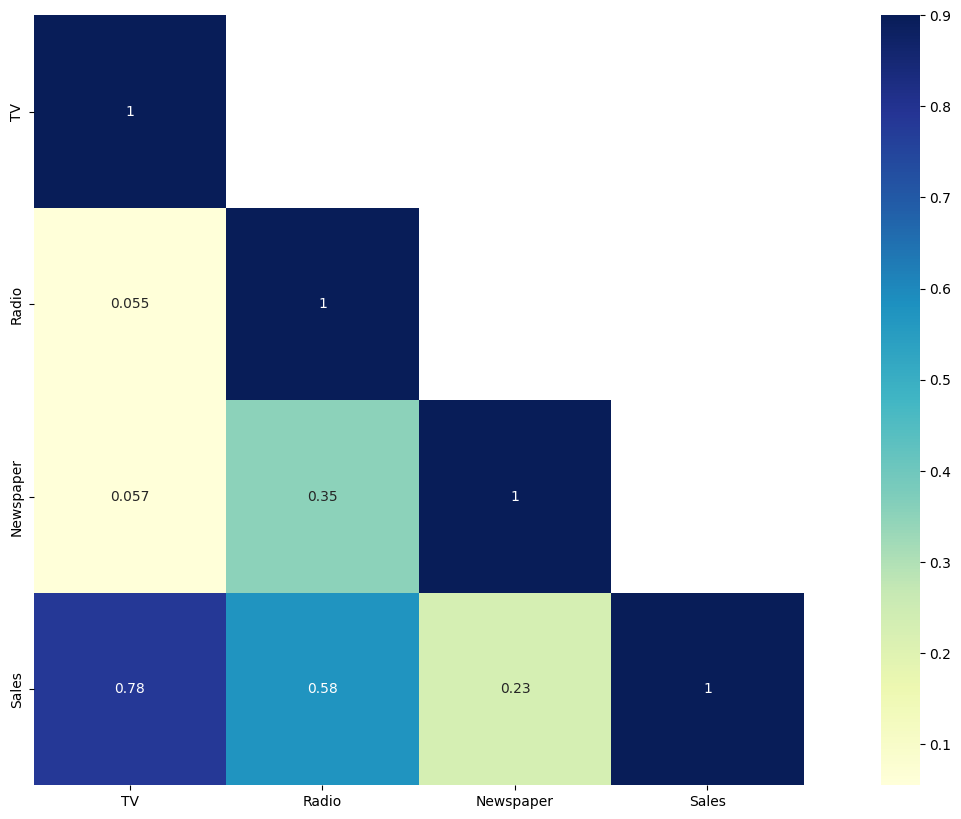

In [19]:
corr = d[['TV','Radio','Newspaper','Sales']].corr()
print("Correlation matrix : \n")
print(corr)
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

We observe that Sales is highly correlated with TV amounts spent, i.e; the more amount spent on TV advertisements, more would be the sales.

## Missing Value Treatment 

In [20]:
#Detection :
d.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

No missing value detected, hence no need for any modification.

## Outlier Detection and Treatment

<Axes: >

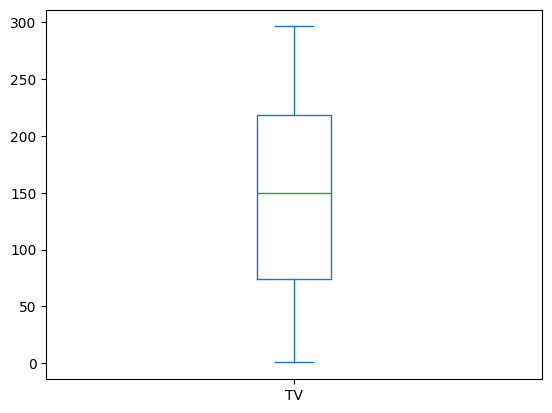

In [21]:
d['TV'].plot.box()

<Axes: >

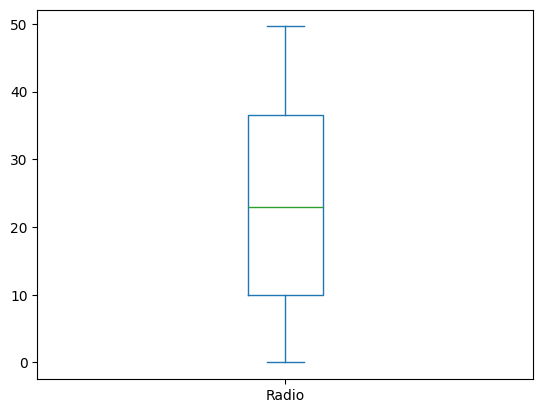

In [22]:
d['Radio'].plot.box()

<Axes: >

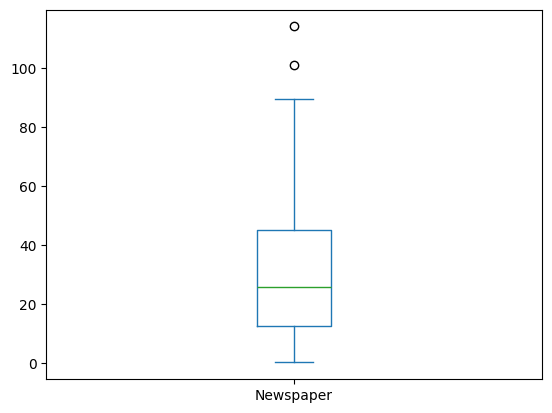

In [23]:
d['Newspaper'].plot.box()

<Axes: >

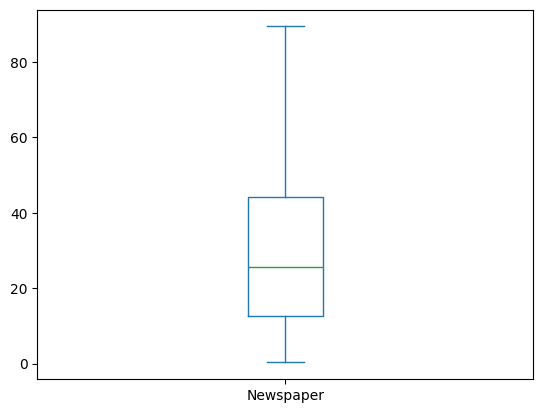

In [24]:
d=d[(d['Newspaper']<100)]               #Outlier treatment
d['Newspaper'].plot.box()

<Axes: >

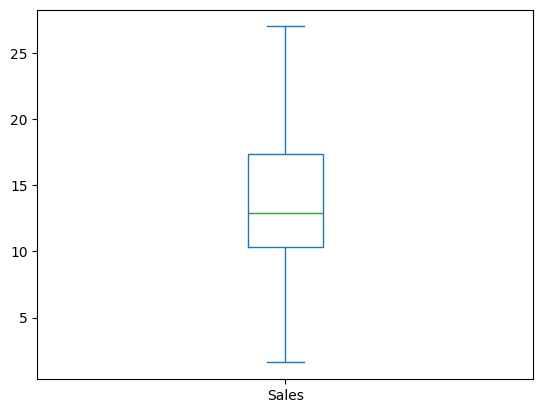

In [25]:
d['Sales'].plot.box()

## MODEL BUILDING

## 1. Linear Regression Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
X=d[['TV','Radio','Newspaper']]         
y=d['Sales']                              #Target Variable

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.03,random_state=12)

In [29]:
lreg=LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred=lreg.predict(X_test)

In [31]:
r2 = r2_score(y_test,y_pred)
print("The value of R-squared is :",r2)

The value of R-squared is : 0.9755626478811481


The obtained R-squared value indicates a very strong predicting model.

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error :", mae)
print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)

Mean Absolute Error : 0.6527825923275211
Mean Squared Error : 0.5265774210876931
Root Mean Squared Error : 0.7256565448527926


The obtained value of Mean absolute error indicates thatpredicted values are different from actual values by unit of around 0.65

## 2. Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
X=d[['TV','Radio','Newspaper']]
y=d['Sales']

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.02,random_state=12)

In [36]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [37]:
y_pred=dtr.predict(X_test)

In [38]:
r2=r2_score(y_test,y_pred)
print("The value of R-squared is:",r2)

The value of R-squared is: 0.9667590027700831


The R-squared value for Decision tree Regressor is slightly less than Linear Regression but still a highly fitting model.

In [39]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error :", mae)
print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)

Mean Absolute Error : 0.4750000000000001
Mean Squared Error : 0.32249999999999995
Root Mean Squared Error : 0.5678908345800273


The obtained value of Mean absolute error indicates thatpredicted values are different from actual values by unit of around less than 1

## 3. K - Neighbours Regressor

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
X=d[['TV','Radio','Newspaper']]
y=d['Sales']

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X , y , test_size=0.1 , random_state=12 )

In [43]:
knn=KNeighborsRegressor(n_neighbors=5)

In [44]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [45]:
y_pred=knn.predict(X_test)

In [46]:
r2=r2_score(y_test,y_pred)
print("The value of R-squared is :",r2)

The value of R-squared is : 0.9254960474327238


The value of R-squared is least in K Neighbours Regressor amongst the three models.

In [47]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print("Mean Absolute Error :",mae)
print("Mean Squared Error :",mse)
print("Root Mean Squared Error :",rmse)

Mean Absolute Error : 1.0630000000000002
Mean Squared Error : 1.9436200000000021
Root Mean Squared Error : 1.3941377263383996


Predicted values os sales differ from actual values by a unit of 1.06